In [2]:
import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [12]:
train_data_dir = 'chest_xray/train'
test_data_dir = 'chest_xray/test'

In [17]:
train_generator = ImageDataGenerator().flow_from_directory(train_data_dir, target_size=(64,64), batch_size=5216)
test_generator = ImageDataGenerator().flow_from_directory(test_data_dir, target_size=(64,64), batch_size=624)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [18]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

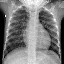

In [15]:
array_to_img(train_images[0])

In [7]:
train_labels[0]

array([0., 1.], dtype=float32)

In [19]:
print('train:', train_images.shape, train_labels.shape)
print('test:', test_images.shape, test_labels.shape)

train: (5216, 64, 64, 3) (5216, 2)
test: (624, 64, 64, 3) (624, 2)


In [20]:
train_unrow = train_images.reshape(5216,-1).T

In [22]:
train_unrow.shape

(12288, 5216)

In [23]:
test_unrow = test_images.reshape(624, -1).T
test_unrow.shape

(12288, 624)

In [24]:
train_labels

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [25]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [26]:
train_label_final = train_labels.T[[0]]

In [27]:
np.shape(train_label_final)

(1, 5216)

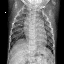

In [28]:
array_to_img(train_images[0])

In [30]:
train_label_final[:,0]

array([1.], dtype=float32)

In [31]:
test_label_final = test_labels.T[[0]]
np.shape(test_label_final)

(1, 624)

In [32]:
train_image_final = train_unrow/255
test_image_final = test_unrow/255

In [33]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64,64,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [34]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         1